<a href="https://colab.research.google.com/github/aso2101340/DeepLearning2022Late/blob/main/DogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kerasを使用したディープラーニングをやってみる
##画像認識を行う

###ライブラリの読み込み

In [2]:
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

###学習済みモデルの読み込み

In [3]:
model = VGG16(weights = 'imagenet')

553476096/553467096 [==============================] - 6s 0us/step


###画像判定のための関数

In [4]:
def predict(filename, featuresize):
  img = image.load_img(filename, target_size = (224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  #学習モデルで判定を実行
  preds = model.predict(preprocess_input(x))
  results = decode_predictions(preds, top = featuresize)[0]
  return results
  #関数終わり

###画像表示のための関数

In [5]:
def showimg(filename, title, i):
  im = Image.open(filename)  #画像ファイルを開く
  im_list = np.array(im)  #画像ビットデータをndarrayにする
  plt.subplot(2, 5, i)
  plt.title(title)
  plt.axis("off")
  plt.imshow(im_list)
  #関数終わり

###Kaggleにある画像データを利用する

###**指定されたURLからファイルをダウンロードする**

In [6]:
#wgetでwebからファイルをダウンロードする
#GoogleColabでコマンドを実行するときは、先頭に！マークを必ずつける事
#小さいファイルをGoogle
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt

--2022-10-04 00:51:20--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 142.251.162.139, 142.251.162.100, 142.251.162.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kvaa0th1cc6gl7gi24oh0v83tbcapr77/1664844675000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=48203ef1-8bc9-4805-a5ee-1040bc113bc1 [following]
--2022-10-04 00:51:20--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kvaa0th1cc6gl7gi24oh0v83tbcapr77/1664844675000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=48203ef1-8bc9-4805-a5ee-1040bc113bc1
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 172.217

##Colabに自分のGoogleアカウントのドライブをマウントする

In [7]:
#googleドライブを操作するモジュールをimport
from google.colab import drive
#googleドライブをマウント
drive.mount('/content/drive')

Mounted at /content/drive


##DLしてきたファイルをマウントしてきたディレクトリにコピーする

In [8]:
#コピーファイルを置くディレクトリを作る
import os
dir_path = "/content/drive/My Drive/2022LATE"
#すでにディレクトリがあってもエラーにしない
os.makedirs(dir_path, exist_ok=True)
!pwd  #今いるディレクトリを表示
#ファイルをコピー
!cp train.zip "/content/drive/My Drive/2022LATE"
#test.zipは一旦使わないのでコピーしない

/content


##GoogleドライブからColabへファイルをコピー

In [9]:
!cp "/content/drive/My Drive/2022LATE/train.zip"

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/train.zip'
Try 'cp --help' for more information.


##zipファイルを解凍する

In [10]:
#unzipコマンドで解凍
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


##解凍した画像を使って画像判定させる

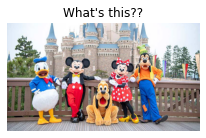

('n03840681', 'ocarina', 0.13852777)
('n02948072', 'candle', 0.058741096)
('n03930313', 'picket_fence', 0.058041938)
('n04462240', 'toyshop', 0.047805957)
('n02699494', 'altar', 0.046423584)
('n04346328', 'stupa', 0.037613884)
('n03970156', 'plunger', 0.033128623)
('n03884397', 'panpipe', 0.033090197)
('n04579432', 'whistle', 0.028667808)
('n03017168', 'chime', 0.022883615)


In [12]:
#画像を指定する変数
#filename = "train/cat.100.jpg"
filename = "parkguide.jpg"
plt.figure(figsize=(20, 10))
for i in range(1):
  showimg(filename, "What's this??", i+1)
#ループ終わり
plt.show() 

#表示した画像を判定
results = predict(filename, 10)
for result in results:
  print(result)